# Task 0: Choosing you project topic

We select the problem type 1: Focusing on Data Modelling and the dataset we choose is Online Shoppers Purchasing Intention Dataset Data Set. The purpose of this topic is to determine the type of consumer who desires to shop by classification. We will use clustering to determine consumer segmentation based on a pair of chosen features.

# Task 1: Retrieving and Preparing the Data

<h4><b>Import library</b></h4>

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, silhouette_score, average_precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.feature_selection import f_regression, f_classif, mutual_info_classif, chi2, SelectKBest
set_config(display='diagram')

<h4><b>Load data</b></h4>

In [43]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv', sep=',')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<h4><b>Data description</b></h4>

<p>The dataset consists of 10 numerical and 8 categorical attributes.</p>
<p>The 'Revenue' attribute can be used as the class label.</p>
<p>We refer to split the data set into train set and test set with ratio 70%-30%. Test set will be kept to calculate the accuracy of the model</p>

In [44]:
df, test_df = train_test_split(data, test_size=0.3, random_state=0)
train_df, val_df = train_test_split(df, test_size=0.25, random_state=0)

### a) Check data types

In [45]:
train_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

The data types are the same as description of the dataset

### b) Deal with missing values
We check the data type of each column and whether the column has missing value

In [46]:
train_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<p>Well, there is no missing values to process</p>
<p>Next, we will choose the categorical and numerical columns to handle quickly.</p>

In [47]:
cate_cols = train_df.columns[-8:]
nume_cols = train_df.columns.drop(cate_cols)

### c) Identify outliers
In this step, we will deal with outliers on numerical columns


In [48]:
train_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.00000
mean,2.324270,80.399526,0.493434,33.703444,31.327514,1170.367305,0.022352,0.043269,5.915124,0.060559,2.128225,2.359802,3.123281,4.08296
std,3.296306,174.386845,1.260308,142.300327,43.979079,1815.344032,0.048564,0.048718,18.936654,0.197239,0.902336,1.693030,2.398097,4.01670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,176.500000,0.000000,0.014064,0.000000,0.000000,2.000000,2.000000,1.000000,2.00000
50%,1.000000,9.000000,0.000000,0.000000,17.000000,583.083333,0.002703,0.025466,0.000000,0.000000,2.000000,2.000000,3.000000,2.00000
75%,4.000000,95.000000,0.000000,0.000000,37.000000,1440.933333,0.017647,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.00000
max,24.000000,2720.500000,24.000000,2256.916667,705.000000,43171.233380,0.200000,0.200000,360.953384,1.000000,8.000000,13.000000,9.000000,20.00000


* Interquartile Range Method

In [49]:
Q1 = train_df[nume_cols].quantile(0.25)
Q3 = train_df[nume_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_iqr_df = train_df[~((train_df[nume_cols] < (Q1 - 1.5 * IQR)) | (train_df[nume_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Percentage of outliers: {round((1-outlier_iqr_df.shape[0]/train_df.shape[0])*100, 2)}%')

Percentage of outliers: 56.31%


This method made us surprised that the outliers claim too high percentage so we need to visualize them

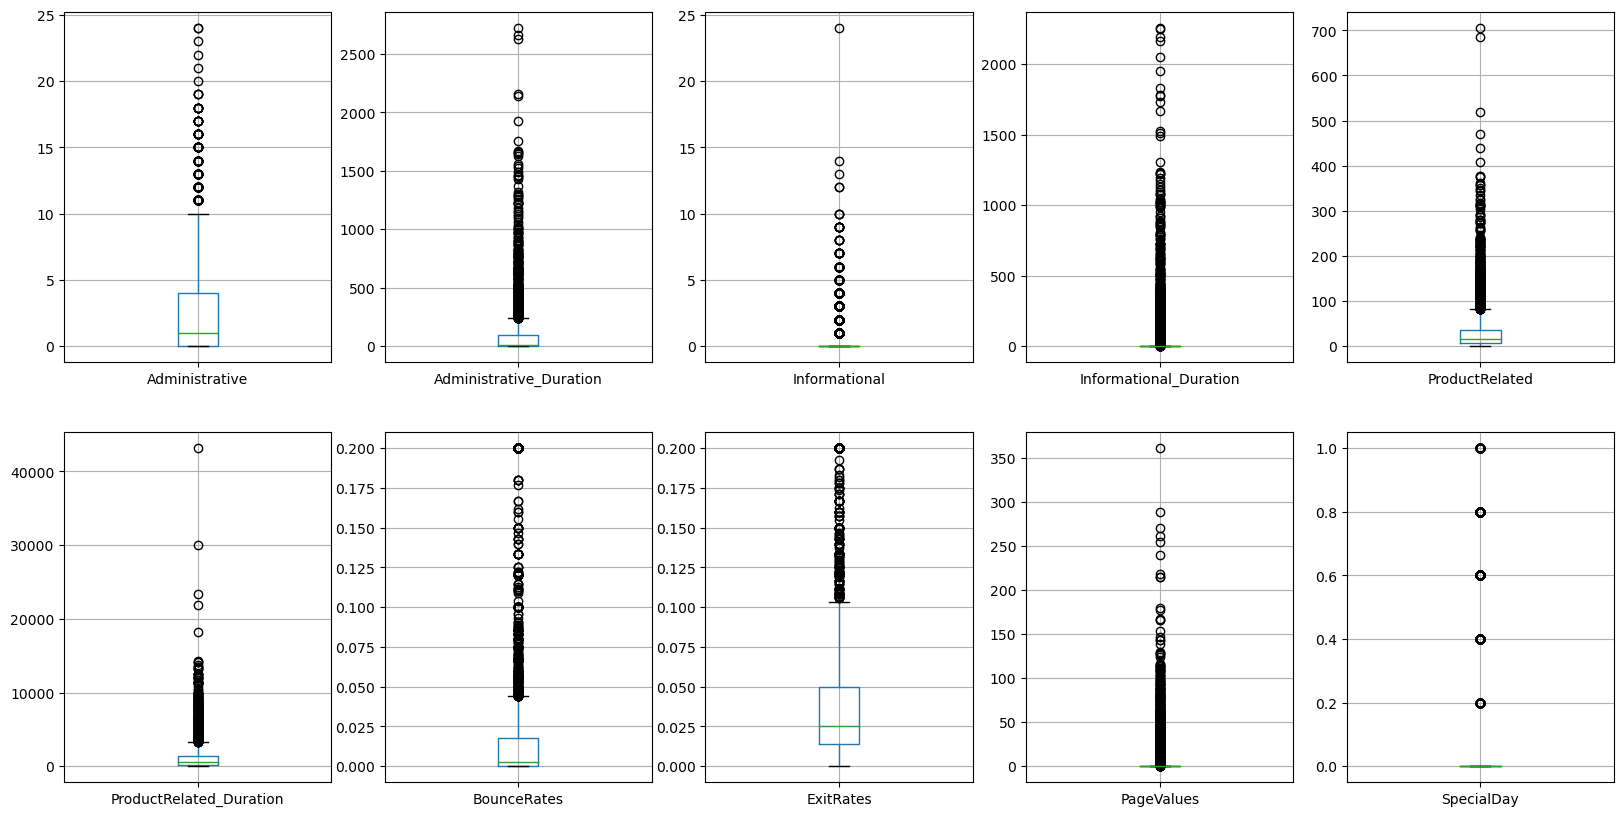

In [50]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for index in range(len(nume_cols)):
    row, col = index // 5, index % 5
    train_df.boxplot(nume_cols[index], ax = axes[row, col], fontsize=10) 
plt.show()

Look at the graph, we can see that each numerical column contains too many outliers that we can not remove them because it can affect the result

* Standard deviation method

In [51]:
data_mean, data_std = np.mean(train_df[nume_cols]), np.std(train_df[nume_cols])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outlier_std_df = train_df[~((train_df[nume_cols] < lower) | (train_df[nume_cols] > upper)).any(axis=1)]
print(f'Percentage of outliers: {round((1-outlier_std_df.shape[0]/train_df.shape[0])*100, 2)}%')

Percentage of outliers: 18.41%


The percentage of outliers is so high that we wonder whether the values are outliers. We intend to use another method so as to handle.

* Automatic Outlier Detection

In [52]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(train_df[nume_cols])
mask = yhat != -1
outlier_aod_df = train_df.iloc[mask]
print(f'Percentage of outliers: {round((1-outlier_aod_df.shape[0]/train_df.shape[0])*100, 2)}%')

Percentage of outliers: 10.38%


<b>We can see that there are too many outliers existed in the dataset. We wonder whether they have their own meaning and decide to disregard them.</b>

### d) Check duplicates

In [53]:
duplicates = train_df.shape[0] - train_df.drop_duplicates().shape[0]
print(f'There are {duplicates} duplicate(s) in the train set and it claims {round(duplicates*100/train_df.shape[0],2)}%')

There are 46 duplicate(s) in the train set and it claims 0.71%


The dataset contains some duplicates so we decide to remove them

In [54]:
train_df.drop_duplicates(inplace=True)

### e) Check category columns

In [55]:
for col in cate_cols:
    print(f'{col}: {train_df[col].unique()}')

Month: ['Dec' 'Sep' 'Mar' 'Oct' 'Nov' 'May' 'Jul' 'Feb' 'Aug' 'June']
OperatingSystems: [3 4 2 1 8 6 5 7]
Browser: [ 3  1  2  4  5  7  8 10  6 13 12 11]
Region: [3 1 2 8 9 5 4 6 7]
TrafficType: [ 3  2  6  1 11 10  8  4 13  5 19 18  9 20  7 15 14 16 12 17]
VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']
Weekend: [False  True]
Revenue: [False  True]


We see that the data is correct after manually checking it, so we don't need to repair it.
To make things easier, we'll encode which columns aren't number to number later.

# Task 2: Feature Engineering

Firstly, we should encode the object values to number in order to handle conveniently.

In [56]:
LE = LabelEncoder()
obj_cols = train_df.select_dtypes(['bool', 'object'])
for col in obj_cols:
    train_df[col] = LE.fit_transform(train_df[col])
train_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9801,0,0.000000,0,0.0,37,2152.588889,0.001081,0.017748,0.0,0.0,1,3,3,3,3,2,0,0
11444,0,0.000000,0,0.0,22,1483.800000,0.000000,0.014463,0.0,0.0,1,4,1,1,2,2,0,0
6079,2,17.200000,0,0.0,0,0.000000,0.000000,0.050000,0.0,0.0,9,2,2,2,6,0,1,1
701,5,175.230769,0,0.0,20,2224.850000,0.004348,0.023913,0.0,0.0,5,4,2,8,1,2,0,0
1949,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,5,2,2,1,1,2,0,0


After encoding, we employ the selectKBest method to determine the relationship between each feature and the revenue column. The chi2 function is used to calculate the score in this method. [3] [4]

In [57]:
best_features = SelectKBest(score_func=chi2)
X = train_df.drop(['Revenue'], axis=1)
y = train_df['Revenue']
fit = best_features.fit(X, y)
scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(X.columns)
featureScores = pd.concat([columns_df, scores_df],axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10, 'Score'))

                    Feature          Score
5   ProductRelated_Duration  426736.148135
8                PageValues   99220.432615
1   Administrative_Duration   19831.770970
3    Informational_Duration   10280.557815
4            ProductRelated    9168.245027
0            Administrative     539.156401
2             Informational     135.486735
9                SpecialDay      32.411059
10                    Month      30.169501
15              VisitorType      21.094891


Text(0.5, 0, 'Correlation Statistic Value')

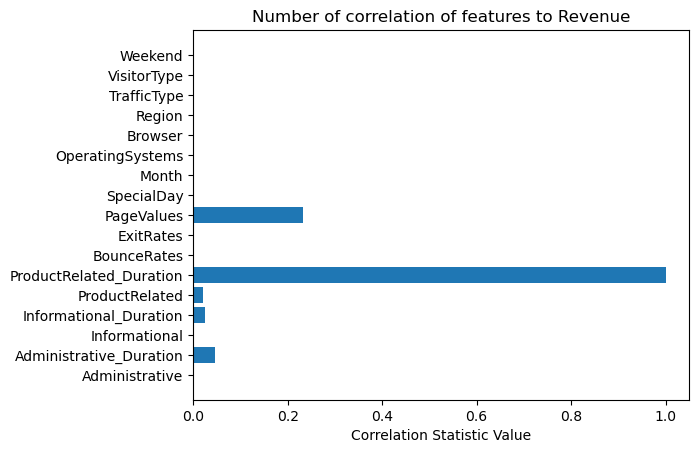

In [58]:
featureScores['Score'] = MinMaxScaler().fit_transform(np.array(featureScores['Score']).reshape(-1, 1))
plt.barh(featureScores['Feature'], featureScores['Score'])
plt.title('Number of correlation of features to Revenue')
plt.xlabel('Correlation Statistic Value')

<p>We assume that the top 7 most correlative with Revenue column will be appropriate for classifying.</p>

Next, we'll look for two features with low correlation.

In [59]:
train_df[nume_cols].corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000000,0.596929,0.381859,0.256733,0.428798,0.380677,-0.217858,-0.314325,0.110473,-0.096406
Administrative_Duration,0.596929,1.000000,0.325060,0.236093,0.272267,0.330144,-0.136003,-0.201790,0.083396,-0.071985
Informational,0.381859,0.325060,1.000000,0.616490,0.371785,0.410927,-0.109297,-0.158088,0.048644,-0.051202
Informational_Duration,0.256733,0.236093,0.616490,1.000000,0.282001,0.358976,-0.066000,-0.099581,0.024683,-0.035969
ProductRelated,0.428798,0.272267,0.371785,0.282001,1.000000,0.869779,-0.197138,-0.289286,0.056488,-0.022929
ProductRelated_Duration,0.380677,0.330144,0.410927,0.358976,0.869779,1.000000,-0.183077,-0.256505,0.050018,-0.036637
BounceRates,-0.217858,-0.136003,-0.109297,-0.066000,-0.197138,-0.183077,1.000000,0.906771,-0.117182,0.096577
ExitRates,-0.314325,-0.201790,-0.158088,-0.099581,-0.289286,-0.256505,0.906771,1.000000,-0.169982,0.123927
PageValues,0.110473,0.083396,0.048644,0.024683,0.056488,0.050018,-0.117182,-0.169982,1.000000,-0.063725
SpecialDay,-0.096406,-0.071985,-0.051202,-0.035969,-0.022929,-0.036637,0.096577,0.123927,-0.063725,1.000000


We assume that SpecialDay is ordinary data, so we avoid it and instead cluster on the `Informational Duration` and `PageValues` columns. The silhouette score is used to evaluate the model.

In [60]:
clustering_features = ['Informational_Duration', 'PageValues']

Now we start to divide the data into X and Y columns using the Revenue is the label class feature.

In [61]:
train_X = train_df.drop(['Revenue'], axis=1)
train_y = train_df['Revenue'].replace({True: 1, False: 0})
val_X = val_df.drop(['Revenue'], axis=1)
val_y = val_df['Revenue'].replace({True: 1, False: 0})
test_X = test_df.drop(['Revenue'], axis=1)
test_y = test_df['Revenue'].replace({True: 1, False: 0})
cate_cols = cate_cols.drop(['Revenue'])

# Data Modelling

### Setup

<p>In order to handle easier and cleaner, we prefer to create a pipeline for each model</p>


<p>Some category columns have too many categories which will have an impact on the model. As a result, we select which columns with more than 5 categories to reduce and replace with values that are less than 1% of the most frequent value</p>

In [62]:
class ColTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=[], num_top_values_list=[], percentage=1, categories=5, default=-1):
        self.num_top_values_list = num_top_values_list
        self.columns = columns
        self.percentage = percentage
        self.categories = categories
        self.default = default

    def getLogicNumberTopValue(self, X_df, column):
        counts = X_df[column].value_counts()
        return sum([1 for value in list(counts.values) if value>(self.percentage*max(list(counts.values))/100)])

    def reprocessing_data(self, X_df):
        self.columns = [column for column in self.columns if len(X_df[column].unique())>=self.categories]
        if len(self.num_top_values_list)==0:
            self.num_top_values_list = [self.getLogicNumberTopValue(X_df, column) for column in self.columns]

    def fit(self, X_df, y=None):
        self.reprocessing_data(X_df)
        self.top_values_list = []
        for column, num_top_values in zip(self.columns, self.num_top_values_list):
            counts_ = X_df[column].value_counts()
            ids = list(counts_.index)
            self.top_values_list.append(ids[:max(1, min(num_top_values, len(ids)))])
        return self
    
    def transform(self, X_df, y=None):
        df = X_df.copy()
        for top_value, column in zip(self.top_values_list, self.columns):
            df.loc[~df[column].isin(top_value), column] = self.default
        return df

In [63]:
new_train_df = train_df.copy()
col_transformer = ColTransformer(columns=cate_cols)
col_transformer.fit(new_train_df)
new_train_X_df = col_transformer.transform(new_train_df)
new_train_X_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9801,0,0.000000,0,0.0,37,2152.588889,0.001081,0.017748,0.0,0.0,1,3,3,3,3,2,0,0
11444,0,0.000000,0,0.0,22,1483.800000,0.000000,0.014463,0.0,0.0,1,4,1,1,2,2,0,0
6079,2,17.200000,0,0.0,0,0.000000,0.000000,0.050000,0.0,0.0,9,2,2,2,6,0,1,1
701,5,175.230769,0,0.0,20,2224.850000,0.004348,0.023913,0.0,0.0,5,4,2,8,1,2,0,0
1949,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,5,2,2,1,1,2,0,0


The preprocessing pipeline will be created to handle the validation set. [2]

<h3>Preprocessing Pipeline</h3>

- `Preprocessing`: The input data will be separated into numeric and categorical data. After splitting, they will both fill up **Missing Values** with the MEAN for the numeric and MOST_FREQUENCY for categorical. Furthermore, categorical will be encoded by `OneHotEncoder`. Finally, we scale the value using Standard Scaler [5]

In [64]:
numerics_trans=make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean')
)
categorical_trans=make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

column_trans = make_column_transformer(
    (numerics_trans, nume_cols),
    (categorical_trans, cate_cols)
)

preprocess_pipeline = make_pipeline(
    col_transformer,
    column_trans,
    StandardScaler(with_mean=False)
)
preprocess_train_X = preprocess_pipeline.fit(X)
preprocess_pipeline

Pipeline(steps=[('coltransformer',
                 ColTransformer(columns=['Month', 'OperatingSystems', 'Browser',
                                         'Region', 'TrafficType'],
                                num_top_values_list=[10, 4, 8, 9, 12])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informati...
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object'))])),
                ('standardscaler', StandardScaler(with_mean=False))])

### Classification
* MLP Classifier

`MLP Classifier`: using Neural Network method, this step will start learning using the preprocessed data and determine the ACCURACY of this model after training.

In [65]:
full_pipeline = Pipeline(steps=[
    ('preprocess', preprocess_pipeline),
    ('mlpclassifier', MLPClassifier(hidden_layer_sizes=(50), activation='relu', solver='adam', random_state=0, learning_rate_init=0.05, alpha=100, max_iter=1000))
])
full_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('coltransformer',
                                  ColTransformer(columns=['Month',
                                                          'OperatingSystems',
                                                          'Browser', 'Region',
                                                          'TrafficType'],
                                                 num_top_values_list=[10, 4, 8,
                                                                      9, 12])),
                                 ('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer())]),
                                                                   Index(['Administrative', 'Administrative_Durati...
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object'))])),
                                 ('standardscaler',
                                  StandardScaler(with_mean=False))])),
                ('mlpclassifier',
                 MLPClassifier(alpha=100, hidden_layer_sizes=50,
                               learning_rate_init=0.05, max_iter=1000,
                               random_state=0))])

In [66]:
full_pipeline.fit(train_X, train_y)
train_acc = full_pipeline.score(train_X, train_y)*100
val_acc = full_pipeline.score(val_X, val_y)*100
print(f'With the above model pipeline we get the accuracy of train: {train_acc.round(3)} and validation: {val_acc.round(3)}')

With the above model pipeline we get the accuracy of train: 85.312 and validation: 84.152


Due to the defined parameters of Neural Network which includes `hidden_layer_sizes=(50), activation='relu', solver='adam', random_state=0, learning_rate_init=0.05, alpha=100, max_iter=1000`, the accuracy of validation set is 84.863%

We want to improve the accuracy so we tend to innovate the current model by using grid search method

In [67]:
optimize_pipeline = Pipeline(steps=[
    ('preprocess', preprocess_pipeline),
    ('selectkbest', SelectKBest(chi2)),
    ('mlpclassifier', MLPClassifier(hidden_layer_sizes=(50), solver='adam', activation='relu', random_state=0, learning_rate_init=0.05, max_iter=1000))
])

param_grid_mlp = {'mlpclassifier__activation': ['logistic', 'relu', 'tanh'],
            'selectkbest__k': [3, 5, 7, 9, 11, 14]}

grid_search_mlp = GridSearchCV(optimize_pipeline, param_grid_mlp)
grid_search_mlp.fit(train_X, train_y)

c:\Users\Pc\miniconda3\envs\min_ds-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
val_acc = grid_search_mlp.score(val_X, val_y)*100
final_score = accuracy_score(grid_search_mlp.predict(test_X), test_y, normalize=True)
print(f'With the grid searching, we discovered a better validation accuracy for the model with {val_acc.round(3)}%')
print(f'In conclusion, using parameters {grid_search_mlp.best_params_}, we obtain the final test score of {final_score.round(3)*100}% in practice')

With the grid searching, we discovered a better validation accuracy for the model with 88.832%
In conclusion, using parameters {'mlpclassifier__activation': 'relu', 'selectkbest__k': 9}, we obtain the final test score of 88.5% in practice


The best parameters are `activation = relu` and `k = 7` that does not meet our expectations

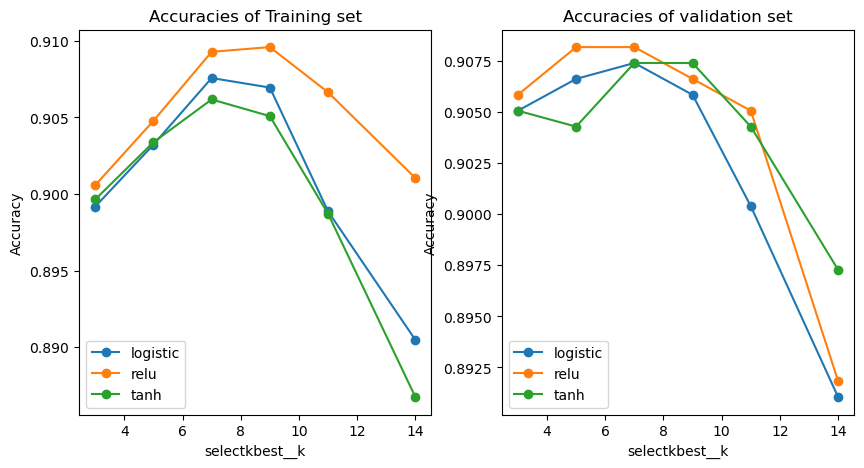

In [ ]:
def plot_grid_search(grid_search, grid_params, attribute='mean_test_score', title='None'):
    scores = np.array(grid_search.cv_results_[attribute]).reshape(len(grid_params[list(grid_params.keys())[0]]), len(grid_params[list(grid_params.keys())[1]]))
    for score, param in zip(scores, grid_params[list(grid_params.keys())[0]]):
        plt.plot(grid_params[list(grid_params.keys())[1]], score, '-o', label=param)
    plt.legend(loc='lower left')
    plt.xlabel(list(grid_params.keys())[1])
    plt.ylabel('Accuracy')
    plt.title(title)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plot_grid_search(grid_search_mlp, param_grid_mlp, title='Accuracies of Training set')
plt.subplot(1, 2, 2)
plot_grid_search(grid_search_mlp, param_grid_mlp, attribute='split2_test_score', title='Accuracies of validation set')

* Decision Tree

`DecisionTreeClassifier`: using Decision Tree method for classifying data into TRUE and FALSE in the Revenue.

In [ ]:
tree_pipeline = Pipeline(steps=[
    ('preprocess', preprocess_pipeline),
    ('selectkbest', SelectKBest(chi2, k=7)),
    ('decisiontree', DecisionTreeClassifier(random_state=0, max_depth=10))
])
tree_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('coltransformer',
                                  ColTransformer(columns=['Month',
                                                          'OperatingSystems',
                                                          'Browser', 'Region',
                                                          'TrafficType'],
                                                 num_top_values_list=[10, 4, 8,
                                                                      9, 12])),
                                 ('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer())]),
                                                                   Index(['Administrative', 'Administrative_Durati...
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object'))])),
                                 ('standardscaler',
                                  StandardScaler(with_mean=False))])),
                ('selectkbest',
                 SelectKBest(k=7,
                             score_func=<function chi2 at 0x0000022BBA453AF0>)),
                ('decisiontree',
                 DecisionTreeClassifier(max_depth=10, random_state=0))])

In [ ]:
tree_pipeline.fit(train_X, train_y)
val_score = tree_pipeline.score(val_X, val_y)*100
train_score = tree_pipeline.score(train_X, train_y)*100
print(f'Train accuracy: {train_score.round(3)}, Validation accuracy: {val_score.round(3)}')

Train accuracy: 95.457, Validation accuracy: 87.952


The validation accuracy is **87.95%** based on the decision model's defined parameters, which includes `max_depth` of 10 and `number of k features kept` of 7.

In [ ]:
optimize_pipeline = Pipeline(steps=[
    ('preprocess', preprocess_pipeline),
    ('selectkbest', SelectKBest(chi2, k=7)),
    ('decisiontree', DecisionTreeClassifier(random_state=0))
])

param_grid_tree = {'decisiontree__min_samples_split': [2, 5, 7, 10, 14, 16],
                'decisiontree__max_depth': [5, 8, 10, 12, 15, 17]}

grid_search_tree = GridSearchCV(tree_pipeline, param_grid_tree)
grid_search_tree.fit(train_X, train_y)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('coltransformer',
                                                         ColTransformer(columns=['Month',
                                                                                 'OperatingSystems',
                                                                                 'Browser',
                                                                                 'Region',
                                                                                 'TrafficType'],
                                                                        num_top_values_list=[10,
                                                                                             4,
                                                                                             8,
                                                                                             9,
                                                                                             12])),
                                                        ('columntransformer',
                                                         ColumnTransformer(transformers=[('pipeline-1',
                                                                                          Pipeline(steps=[('simpleimputer',
                                                                                                           SimpleImputer())]),
                                                                                          Index(['Administrative'...
       'VisitorType', 'Weekend'],
      dtype='object'))])),
                                                        ('standardscaler',
                                                         StandardScaler(with_mean=False))])),
                                       ('selectkbest',
                                        SelectKBest(k=7,
                                                    score_func=<function chi2 at 0x0000022BBA453AF0>)),
                                       ('decisiontree',
                                        DecisionTreeClassifier(max_depth=10,
                                                               random_state=0))]),
             param_grid={'decisiontree__max_depth': [5, 8, 10, 12, 15, 17],
                         'decisiontree__min_samples_split': [2, 5, 7, 10, 14,
                                                             16]})

In [ ]:
val_score = grid_search_tree.score(val_X, val_y)*100
print(f'Validation accuracy: {val_score.round(3)}')

Validation accuracy: 88.508


After grid searching in the fields of `min sample split` and `max depth`, we figure out the new better accuracy is ~ **88.81%**

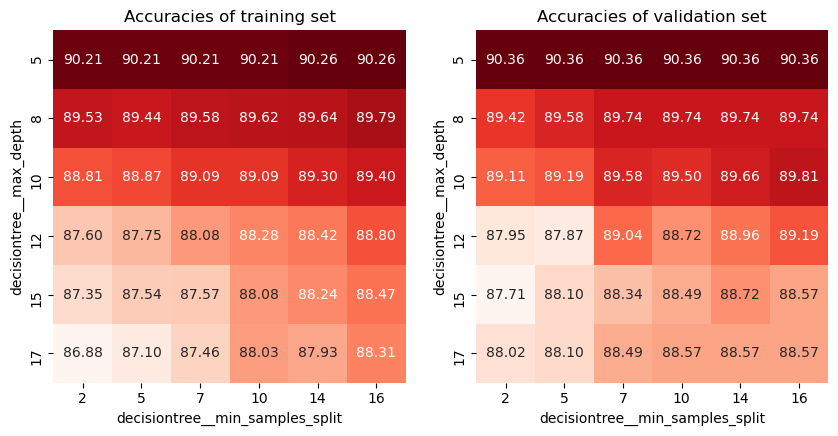

In [ ]:
def plot_grid_search_heatmap(grid_search, grid_params, attribute='mean_test_score', title='None'):
    scores = np.array(grid_search.cv_results_[attribute]*100).reshape(6,6)
    df_heatmap = pd.DataFrame(scores, columns=grid_params[list(grid_params.keys())[0]], index=param_grid_tree[list(param_grid_tree.keys())[1]])
    sns.heatmap(df_heatmap, square=True, annot=True, cbar=False, fmt='.2f', cmap='Reds')
    plt.title(title)
    plt.xlabel(list(grid_params.keys())[0])
    plt.ylabel(list(grid_params.keys())[1])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plot_grid_search_heatmap(grid_search_tree, param_grid_tree, title='Accuracies of training set')
plt.subplot(1, 2, 2)
plot_grid_search_heatmap(grid_search_tree, param_grid_tree, attribute='split0_test_score', title='Accuracies of validation set')

After grid searching, we obtain tables heatmap of training and validate accuracies. From the heatmap, it is clear that with the depth of 5 and only 2 for minimum sample split could result in a better accuracy. In which, the train and validate accuracies are quite approximating, the overfitting problem has been solved with a final score ~90%

In [ ]:
test_acc = accuracy_score(grid_search_tree.predict(test_X), test_y)*100
print(f'Appying above model for the final test set and we get the accuracy: {test_acc.round(3)}%')

Appying above model for the final test set and we get the accuracy: 87.726%


* Comparing and Recommendation

After building up models of classification, using MLBClassifier and DecisionTreeClassifier, we have to conclude that this type of data is more suitable with the later model. Particularly, due to the small number of features and small number of samples, Decision takes less time for modeling the functions although it leads to a nearly same accuracy with MLBClassifier.

In [ ]:
tree_recall = recall_score(grid_search_tree.predict(test_X), test_y)*100
tree_precision = average_precision_score(grid_search_tree.predict(test_X), test_y)*100
print(f'The precision of Tree is {tree_precision.round(3)} and recall is {tree_recall.round(3)}')

The precision of Tree is 33.631 and recall is 73.464


In [ ]:
mlp_recall = recall_score(grid_search_mlp.predict(test_X), test_y)*100
mlp_precision = average_precision_score(grid_search_mlp.predict(test_X), test_y)*100
print(f'The precision of MLP is {mlp_precision.round(3)} and recall is {mlp_recall.round(3)}')

The precision of MLP is 36.136 and recall is 79.118


### Clustering

With the selected features above, we will handle on `Informational_Duration` and `PageValues`

<AxesSubplot:xlabel='Informational_Duration', ylabel='PageValues'>

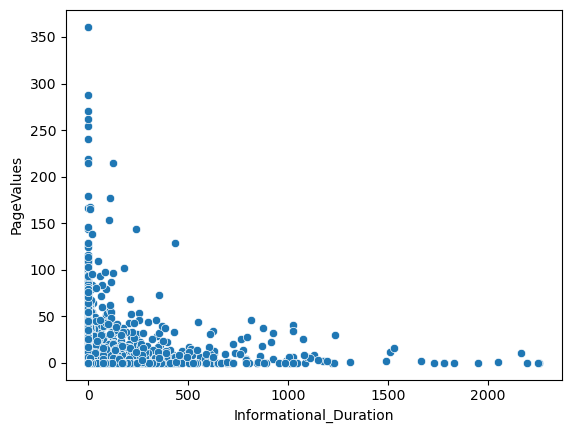

In [ ]:
clustering_features = ['Informational_Duration', 'PageValues']
sns.scatterplot(data=train_df, x='Informational_Duration', y='PageValues')

* K-means clustering

In [ ]:
from sklearn.metrics import accuracy_score
matrix = train_X[['Informational_Duration', 'PageValues']].copy()
for n_clusters in range(2,8):
    kmeans = KMeans(n_clusters = n_clusters, n_init=10)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print(f'For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg.round(3)}')

For n_clusters = 2, the average silhouette_score is: 0.94
For n_clusters = 3, the average silhouette_score is: 0.895
For n_clusters = 4, the average silhouette_score is: 0.886
For n_clusters = 5, the average silhouette_score is: 0.854
For n_clusters = 6, the average silhouette_score is: 0.836
For n_clusters = 7, the average silhouette_score is: 0.817


The higher average silhouette score, the more efficient clustering. We generate a scatter plot with labelled data points to confirm this.

<AxesSubplot:xlabel='Informational_Duration', ylabel='PageValues'>

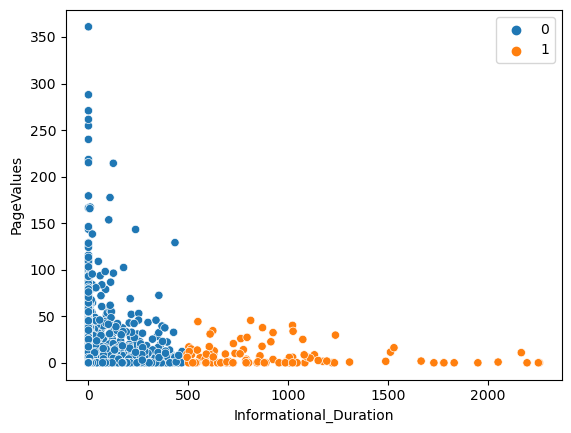

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(matrix)
label = kmeans.predict(matrix)
sns.scatterplot(data=matrix, x='Informational_Duration', y='PageValues', hue=label)

It can be seen clearly in the above figure that each cluster is well apart from each other.

* Hierarchical clustering

The `AgglomerativeClustering` object performs a hierarchical clustering using a bottom up approach. We sill apply this method to handle

In [ ]:
matrix = train_X[['Informational_Duration', 'PageValues']].copy()
for n_clusters in range(2,8):
    model = AgglomerativeClustering(n_clusters = n_clusters)
    clusters = model.fit_predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print(f'For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg.round(3)}')

For n_clusters = 2, the average silhouette_score is : 0.933
For n_clusters = 3, the average silhouette_score is : 0.926
For n_clusters = 4, the average silhouette_score is : 0.855
For n_clusters = 5, the average silhouette_score is : 0.857
For n_clusters = 6, the average silhouette_score is : 0.836
For n_clusters = 7, the average silhouette_score is : 0.807


The highest score is at n_clusters = 2 too, we need to visualize so as to have a better view

<AxesSubplot:xlabel='Informational_Duration', ylabel='PageValues'>

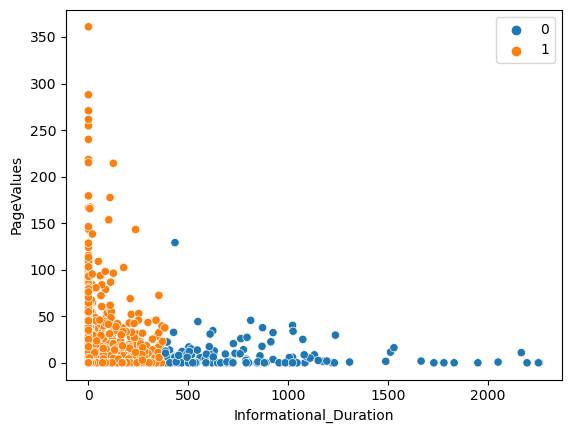

In [ ]:
model = AgglomerativeClustering(n_clusters=2)
label = model.fit_predict(matrix)
sns.scatterplot(data=matrix, x='Informational_Duration', y='PageValues', hue=label)

### Comparing and Recommandation

We can detect several variations between the two approaches. The k-means method initially performs poorly but eventually better than hierarchical clustering. K-means requires the clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes so we recommend using `Hierarchical clustering` which has more options to handle in practice

# References

[1] Statistic Correlation: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ <br>
[2] Transform Target: https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression <br>
[3] Wiki_Chi2: https://en.wikipedia.org/wiki/Chi-squared_test <br>
[4] Wiki_PersonalChi2: https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test <br>
[5] Scaling Method: https://ndquy.github.io/posts/cac-phuong-phap-scaling/ <br>
[6] Overfitting Confronting: https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09<br>
[7] Unsuppervised Learning Research: https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a <br>
[8] KMean Clustering: https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a <br>
[9] Clustering Coefficient: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c <br>